<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/pca.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

|                                     -                                     |
|---------------------------------------------------------------------------|
| [Exercise 8 (explained variance)](<#Exercise-8-(explained-variance&#41;>) |



# ML: Principal component analysis

## Principal component analysis

Principal component analysis is an unsupervised learning method that tries to detect the directions in which the vector formed data varies most. It first finds the direction of highest variance, and then proceeds to discover directions of highest variance that are orthogonal to those direction already found. So, for n dimensional data, it returns, by default, n orthogonal directions and the corresponding variances. These directions are called *pricipal axes*, and if we project a data point to these axes, we get the *principal components* of each axis.

To use another terminology, the set of principal axes forms a base for the vector space where the data points reside, and the principal components are the coordinates of the data points in this new coordinate system. The `PCA` class in the scikit-learn library has a `transform` method, which transforms data to this new coordinate system.

Let's look at an example where the data is from multi-variate Gaussian distribution.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.decomposition import PCA
%matplotlib inline

First we sample data from this distribution, and then we plot it.

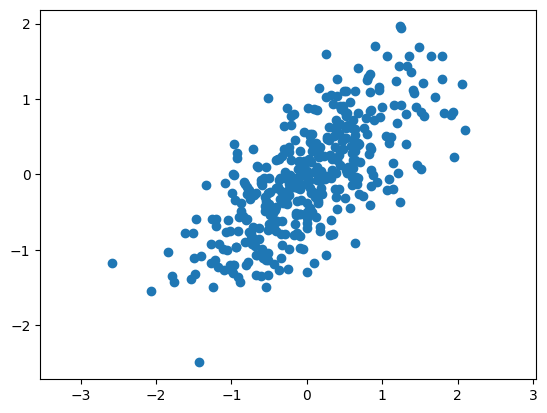

In [2]:
rng=np.random.RandomState(0)
X=rng.randn(2,400)
scale=np.array([[1,0], [0,0.4]])  # Standard deviations are 1 and 0.4
rotate=np.array([[1,-1], [1,1]]) / math.sqrt(2)
transform = np.dot(rotate, scale)
X=np.dot(transform, X)
#X=np.dot(scale, X)
#X=np.dot(rotate, X)
X=X.T
plt.axis('equal')
plt.scatter(X[:,0], X[:,1]);

Let's first apply the PCA to the data to obtain the principal axes and their variances.

In [3]:
from sklearn.decomposition import PCA
def arrow(v1, v2, ax):
    arrowprops=dict(arrowstyle='->',
                   linewidth=2,
                   shrinkA=0, shrinkB=0)
    ax.annotate("", v2, v1, arrowprops=arrowprops)
pca=PCA(2)
pca.fit(X)
print("Principal axes:", pca.components_)
print("Explained variance:", pca.explained_variance_)
print("Mean:", pca.mean_)

Principal axes: [[ 0.73072907  0.68266758]
 [-0.68266758  0.73072907]]
Explained variance: [0.97980663 0.16031015]
Mean: [ 0.01333067 -0.05370929]


Then we draw vectors whose directions reflect those of the principal axes, and whose lengths are the corresponding variances. Then we plot the data in this new coordinate system.

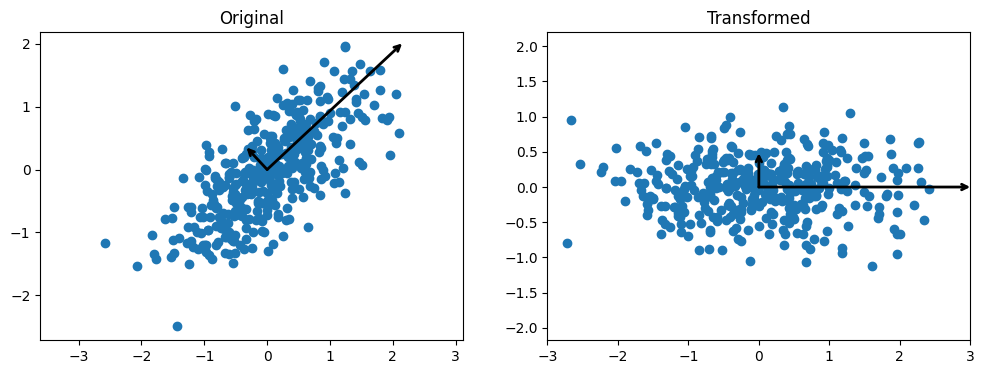

In [4]:
Z=pca.transform(X)
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].axis('equal')
axes[0].scatter(X[:,0], X[:,1])
axes[1].axis('equal')
axes[1].set_xlim(-3,3)
axes[1].scatter(Z[:,0], Z[:,1])
for l, v in zip(pca.explained_variance_, pca.components_):
    arrow([0,0], v*l*3, axes[0])
for l, v in zip([1.0,0.16], [np.array([1.0,0.0]),np.array([0.0,1.0])]):
    arrow([0,0], v*l*3, axes[1])
axes[0].set_title("Original")
axes[1].set_title("Transformed");

You may have noticed that we gave the PCA constructor a parameter with value 2. This parameter gives the number of principal axes we want. If the parameter value is n, then the algorithm returns only n components with the highest variances and drops those components with lower variance. So, this algorithm can be used as a dimensionality reduction technique. The components with low variance are assumed not to contain any important information.

Let's use PCA to project the above data to one dimension.

[[0.73072907 0.68266758]]


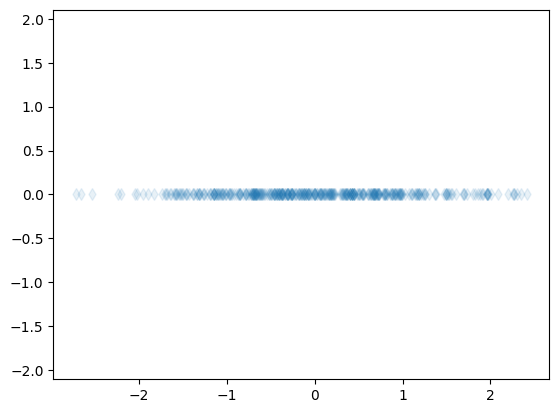

In [7]:
pca=PCA(n_components=1)
pca.fit(X)
Z=pca.transform(X)
print(pca.components_)
plt.axis('equal')
plt.scatter(Z[:,0],np.zeros(400), marker="d", alpha=0.1);

The dimensionality reduction can be used, for example, to project high-dimensional data in two or three dimensions to allow visualization of data. Additionally, dimensionality reduction can be used as a preprocessing method to obtain only the important features from the data. These important features can then be used, for example, for regression or classification.

### Example of feature extraction

In [9]:
from sklearn.datasets import load_diabetes
X, y = load_diabetes(return_X_y=True)
print(X.shape)
print(y.shape)

(442, 10)
(442,)


In [11]:
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

# Print the first 3 data points (features)
print("First 3 data points (features):")
for i in range(3):
    print(X[i])

# Print the corresponding target values
print("\nCorresponding target values:")
for i in range(3):
    print(y[i])

First 3 data points (features):
[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
 -0.04340085 -0.00259226  0.01990749 -0.01764613]
[-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
  0.07441156 -0.03949338 -0.06833155 -0.09220405]
[ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
 -0.03235593 -0.00259226  0.00286131 -0.02593034]

Corresponding target values:
151.0
75.0
141.0


[0.00912519 0.00338394]


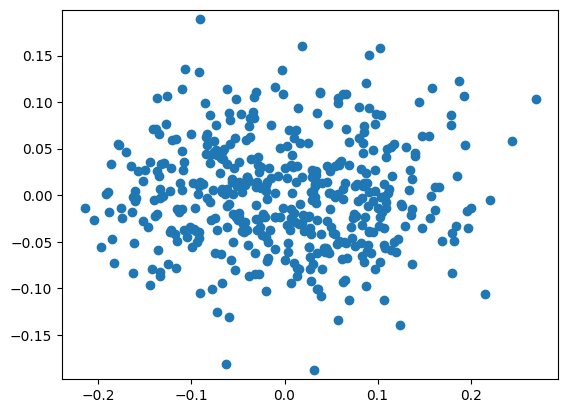

In [15]:
pca=PCA(2)
pca.fit(X)
print(pca.explained_variance_)
Z=pca.transform(X)
plt.axis('equal')
plt.scatter(Z[:,0], Z[:,1]);

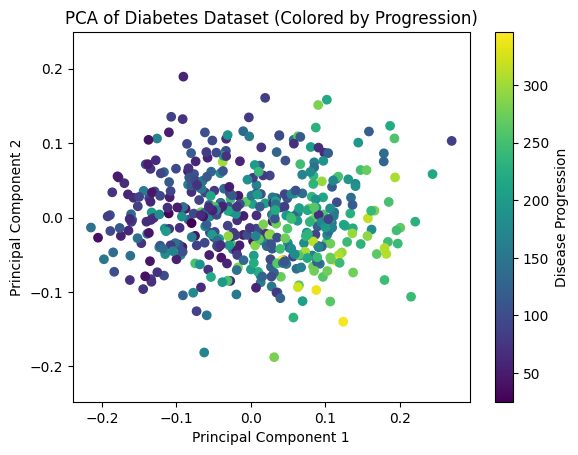

In [16]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

pca = PCA(2)
pca.fit(X)
Z = pca.transform(X)

plt.axis('equal')
plt.scatter(Z[:, 0], Z[:, 1], c=y, cmap='viridis') # Color dots based on 'y' using 'viridis' colormap
plt.colorbar(label='Disease Progression') # Add colorbar for reference
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Diabetes Dataset (Colored by Progression)')
plt.show()

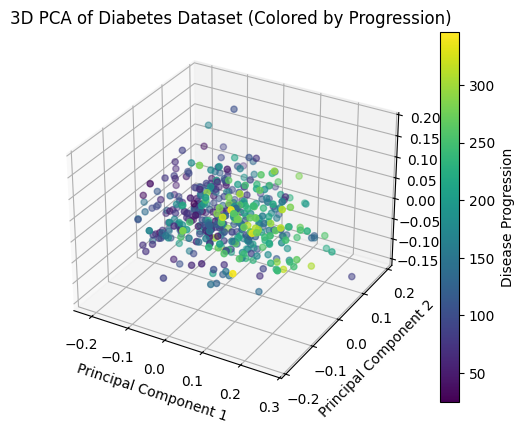

In [18]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # Import for 3D plotting
from sklearn.decomposition import PCA
from sklearn.datasets import load_diabetes

X, y = load_diabetes(return_X_y=True)

pca = PCA(3)  # Change to 3 components for 3D
pca.fit(X)
Z = pca.transform(X)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')  # Create a 3D subplot

scatter = ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], c=y, cmap='viridis')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title('3D PCA of Diabetes Dataset (Colored by Progression)')

fig.colorbar(scatter, label='Disease Progression')

plt.show()

[5.84366626e+01 3.69031722e+01 1.56915171e+01 5.40324183e-30
 3.53632141e-30 8.22256533e-31 6.13987022e-31 3.35421909e-31
 1.90031198e-31 1.46139908e-31]


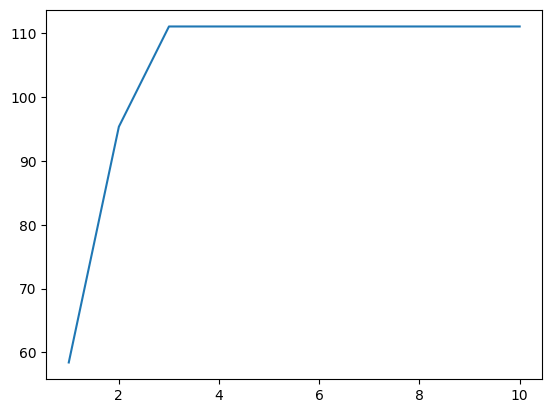

In [20]:
pca=PCA()
pca.fit(X)
v=pca.explained_variance_
print(v)
plt.plot(np.arange(1,11), np.cumsum(v));

#### <div class="alert alert-info">Exercise 8 (explained variance)</div>

This exercise can give two points at maximum!

Part 1.

Write function `explained_variance` which reads the tab separated file "data.tsv". The data contains 10 features. Then fit PCA to the data. The function should return two lists (or 1D arrays). The first list should contain the variances of all the features.  The second list should consist of the explained variances returned by the PCA.

In the main function print these values in the following form:
```
The variances are: ?.??? ?.??? ...
The explained variances after PCA are: ?.??? ?.??? ...
```
Print the values with three decimal precision and separate the values by a space.

Part 2.

Plot the cumulative explained variances. The y-axis should be the cumulative sum, and the x-axis the number of terms in the cumulative sum.
<hr/>

## Summary (week 6)

* We got to know another supervised learning method, namely, naive Bayes classification
* We saw examples of naive Bayes classification where either Gaussian or multinomial distribution was used to model the features of samples belonging to a class
* We saw how to use cross validation to asses prediction abilities of a model. This allows us to be sure that the model is not overfitting.
* In the clustering section we saw examples of using k-means, DBSCAN, and hierarchical clustering methods. They have different approaches to clustering, and each have different strengths.
* Clustering is based on the notion of distance between the points in the data.
* Principal component analysis is another example of unsupervised learning
* It can reduce the dimensionality of a data by throwing away those dimensions where the variability is low.

<!--NAVIGATION-->


<a href="https://colab.research.google.com/github/saskeli/x/blob/master/pca.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
